# Laboratorio 1.0: 

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```

----
# 1.

Lecutra de datos

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv')

In [37]:
df.head()

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


# 2.
Definir como indice la columna time y eliminar columna Unnamed: 0

In [38]:
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head()

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


# 3.
Obtener información del dataset

In [39]:
df.describe()

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.043891,1.044815,1.042991,1.043906,3690.249400,8.981600,0.0,1.043898,0.000012,0.000012,0.000012
std,0.041135,0.040991,0.041263,0.041135,2800.488505,5.785115,0.0,0.041129,0.001400,0.001404,0.000978
min,0.953910,0.955930,0.953570,0.953910,85.000000,0.000000,0.0,0.954735,-0.013970,-0.014010,-0.007260
25%,1.002718,1.003507,1.001715,1.002705,1738.750000,8.000000,0.0,1.002648,-0.000580,-0.000600,-0.000425
50%,1.055670,1.056795,1.054960,1.055700,2999.500000,8.000000,0.0,1.055712,-0.000005,0.000000,0.000005
75%,1.078940,1.079582,1.078222,1.078947,4861.000000,8.000000,0.0,1.078955,0.000620,0.000612,0.000430
max,1.108470,1.109530,1.108050,1.108500,23708.000000,183.000000,0.0,1.108280,0.017340,0.017420,0.010780


# 4.
Determinar si hay null o nan en el data set

In [40]:
df.isnull().sum()

open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64

In [41]:
df.isna().sum()

open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64

# 5.
Usando Pasca Case y estudianto la columna close

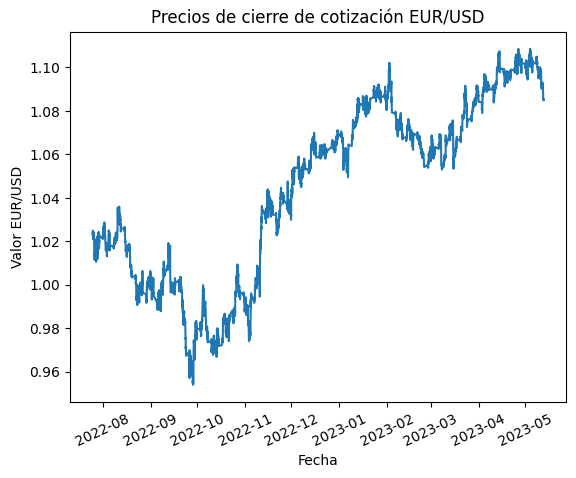

In [42]:
plt.plot(df['close'])
plt.title('Precios de cierre de cotización EUR/USD')
plt.ylabel('Valor EUR/USD')
plt.xlabel('Fecha')
plt.xticks(rotation = 25)
plt.show()

In [43]:
df['DiffPrice'] = df['close'].diff(1)

In [44]:
df.DiffPrice

time
2022-07-25 13:00:00        NaN
2022-07-25 14:00:00   -0.00046
2022-07-25 15:00:00    0.00158
2022-07-25 16:00:00    0.00028
2022-07-25 17:00:00   -0.00304
                        ...   
2023-05-12 19:00:00   -0.00038
2023-05-12 20:00:00    0.00032
2023-05-12 21:00:00   -0.00015
2023-05-12 22:00:00   -0.00013
2023-05-12 23:00:00   -0.00024
Name: DiffPrice, Length: 5000, dtype: float64

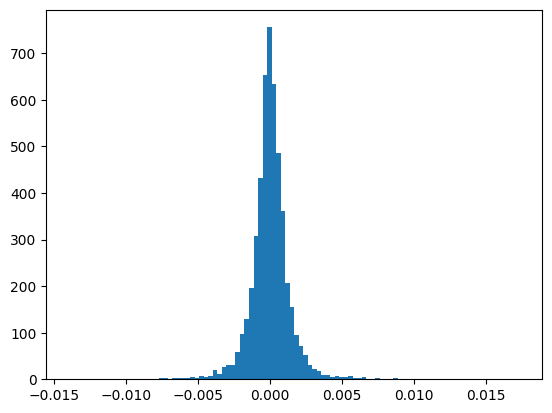

In [45]:
plt.hist(df.DiffPrice, bins=100)
plt.show()

# 6.

Determinar la distribución que mejor se ajusta a los datos de diferencia con el precio anterior.

{'johnsonsu': {'a': -0.020654532350683215,
  'b': 1.049797421216857,
  'loc': -1.5194909287993722e-05,
  'scale': 0.0008808828671326262}}

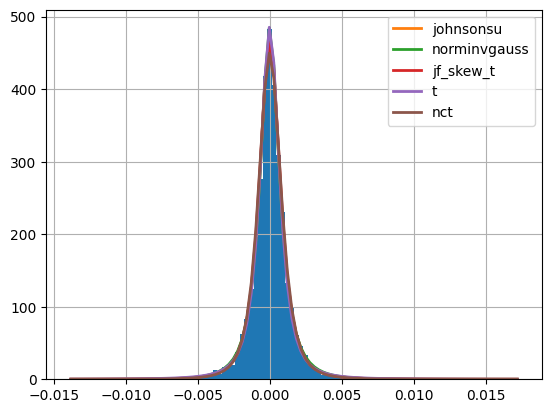

In [46]:
from fitter import Fitter, get_common_distributions, get_distributions

data = df.DiffPrice.dropna()

f = Fitter(data,
           distributions=get_distributions())
f.fit()
f.summary()
# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
# Indentificamos parametros de la distrubicion beta

In [47]:
f.get_best()

{'johnsonsu': {'a': -0.020654532350683215,
  'b': 1.049797421216857,
  'loc': -1.5194909287993722e-05,
  'scale': 0.0008808828671326262}}

In [48]:
f.fitted_param["johnsonsu"]

(-0.020654532350683215,
 1.049797421216857,
 -1.5194909287993722e-05,
 0.0008808828671326262)

# 7.

Seleccionar datos solamente del 2023.

In [49]:
Data2023 = df[df.index.year == 2023]
Data2023

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen,DiffPrice
time,,,,,,,,,,,,
2023-01-02 00:00:00,1.06998,1.07061,1.06795,1.06796,98,57,0,1.068970,-0.00200,-0.00063,-0.001315,-0.00200
2023-01-02 01:00:00,1.06847,1.06965,1.06847,1.06965,91,183,0,1.069060,0.00169,-0.00151,0.000090,0.00169
2023-01-02 02:00:00,1.06965,1.07060,1.06904,1.07058,325,11,0,1.070115,0.00093,0.00118,0.001055,0.00093
2023-01-02 03:00:00,1.07058,1.07075,1.06837,1.06896,271,26,0,1.069770,-0.00162,0.00093,-0.000345,-0.00162
2023-01-02 04:00:00,1.06895,1.06896,1.06799,1.06880,137,78,0,1.068875,-0.00016,-0.00163,-0.000895,-0.00016
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545,-0.00038
2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020,0.00032
2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075,-0.00015


# 8.
Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

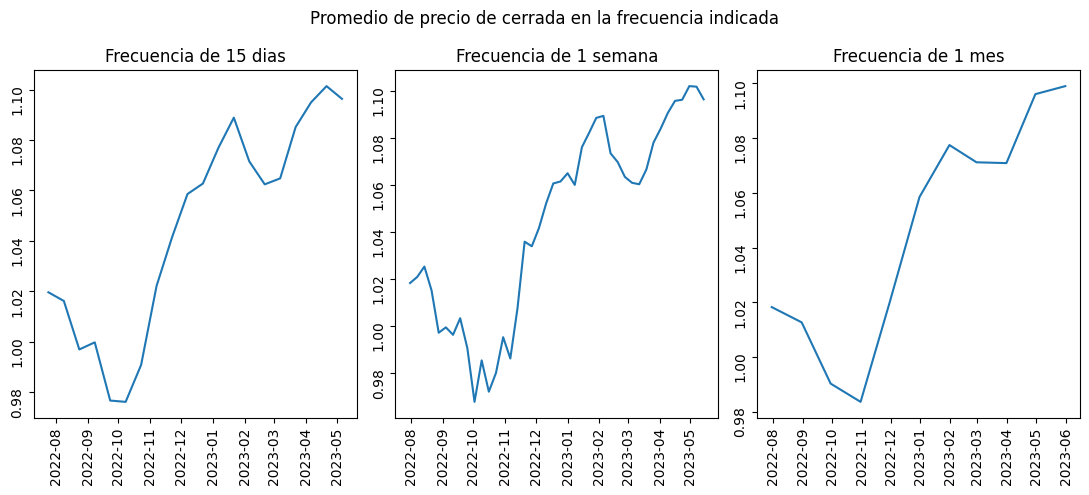

In [50]:
DataWith15DaysFreq = df.groupby(pd.Grouper(freq='15D'))
DataWith1weekFreq  = df.groupby(pd.Grouper(freq='1W'))
DataWith1MonthFreq = df.groupby(pd.Grouper(freq='1ME'))

FigGrouper, ax = plt.subplots(1,3,figsize=(11,5))

ax[0].plot(DataWith15DaysFreq['close'].mean())
ax[1].plot(DataWith1weekFreq['close'].mean() )
ax[2].plot(DataWith1MonthFreq['close'].mean())

FigGrouper.suptitle('Promedio de precio de cerrada en la frecuencia indicada')
ax[0].set_title('Frecuencia de 15 dias')
ax[1].set_title('Frecuencia de 1 semana')
ax[2].set_title('Frecuencia de 1 mes')

ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)
ax[2].tick_params(labelrotation=90)

plt.tight_layout()
plt.show()

# 9.
Para los datos asociados a los meses de 2023, construya un histograma para cada mes.

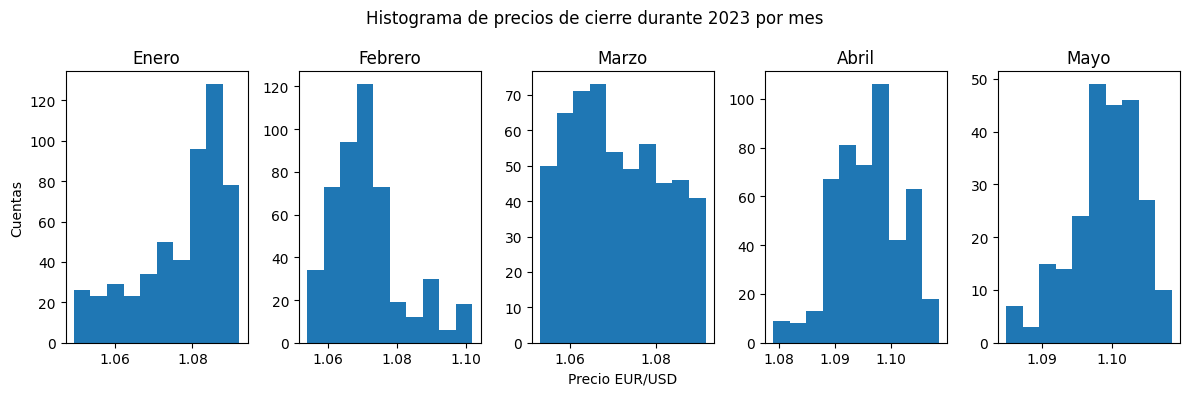

In [51]:
meses = {1:'Enero',
         2:'Febrero',
         3:'Marzo',
         4:'Abril',
         5:'Mayo',
         6:'Junio',
         7:'Julio',
         8:'Agosto',
         9:'Septiembre',
         10:'Octubre',
         11:'Noviembre',
         12:'Diciembre',}

q=Data2023.groupby(pd.Grouper(freq='1MS'))
Fig2023Months, ax = plt.subplots(1, len(q), figsize=(12,4))

Fig2023Months.suptitle('Histograma de precios de cierre durante 2023 por mes')

i = 0
for name, group in q:
  ax[i].hist(group['close'])
  ax[i].set_title(meses[name.month])

  i += 1

ax[0].set_ylabel('Cuentas')
ax[2].set_xlabel('Precio EUR/USD')
plt.tight_layout()
plt.show()
  

-----

## Análisis de datos con pandas. 

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


----
# 1.
Leer los datos desde una página web.

In [52]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
CancerDataFrame = breast_cancer_wisconsin_diagnostic.data.features 
Targets = breast_cancer_wisconsin_diagnostic.data.targets 

# 2.
Renombrar las columnas en formato PascalCase.

In [53]:
import pandas as pd

def snake_to_pascal(df):
    # Función auxiliar que convierte snake_case a PascalCase
    def to_pascal_case(snake_str):
        components = snake_str.split('_')
        return ''.join(x.capitalize() for x in components)
    
    # Renombramos las columnas del DataFrame
    df.columns = [to_pascal_case(col) for col in df.columns]
    
    return df

In [54]:
CancerDataFrame = snake_to_pascal(CancerDataFrame)
CancerDataFrame.columns

Index(['Radius1', 'Texture1', 'Perimeter1', 'Area1', 'Smoothness1',
       'Compactness1', 'Concavity1', 'ConcavePoints1', 'Symmetry1',
       'FractalDimension1', 'Radius2', 'Texture2', 'Perimeter2', 'Area2',
       'Smoothness2', 'Compactness2', 'Concavity2', 'ConcavePoints2',
       'Symmetry2', 'FractalDimension2', 'Radius3', 'Texture3', 'Perimeter3',
       'Area3', 'Smoothness3', 'Compactness3', 'Concavity3', 'ConcavePoints3',
       'Symmetry3', 'FractalDimension3'],
      dtype='object')

# 3.
Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

In [55]:
CancerDataFrame.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [56]:
CancerDataFrame.tail()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [57]:
CancerDataFrame.describe()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [58]:
CancerDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non

# 4.
Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos ¿Qué estrategia propondrías para reemplazarlos?

In [59]:
CancerDataFrame.isnull().sum()

Radius1              0
Texture1             0
Perimeter1           0
Area1                0
Smoothness1          0
Compactness1         0
Concavity1           0
ConcavePoints1       0
Symmetry1            0
FractalDimension1    0
Radius2              0
Texture2             0
Perimeter2           0
Area2                0
Smoothness2          0
Compactness2         0
Concavity2           0
ConcavePoints2       0
Symmetry2            0
FractalDimension2    0
Radius3              0
Texture3             0
Perimeter3           0
Area3                0
Smoothness3          0
Compactness3         0
Concavity3           0
ConcavePoints3       0
Symmetry3            0
FractalDimension3    0
dtype: int64

In [60]:
print('La cantidad total del nulos es: ',CancerDataFrame.isnull().sum().sum())

La cantidad total del nulos es:  0


In [61]:
CancerDataFrame.isna().sum()

Radius1              0
Texture1             0
Perimeter1           0
Area1                0
Smoothness1          0
Compactness1         0
Concavity1           0
ConcavePoints1       0
Symmetry1            0
FractalDimension1    0
Radius2              0
Texture2             0
Perimeter2           0
Area2                0
Smoothness2          0
Compactness2         0
Concavity2           0
ConcavePoints2       0
Symmetry2            0
FractalDimension2    0
Radius3              0
Texture3             0
Perimeter3           0
Area3                0
Smoothness3          0
Compactness3         0
Concavity3           0
ConcavePoints3       0
Symmetry3            0
FractalDimension3    0
dtype: int64

In [62]:
print('La cantidad total del NaN es: ',CancerDataFrame.isna().sum().sum())

La cantidad total del NaN es:  0


# 5.
Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

In [63]:
Targets['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

# 6.
Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

<Axes: xlabel='count', ylabel='Diagnosis'>

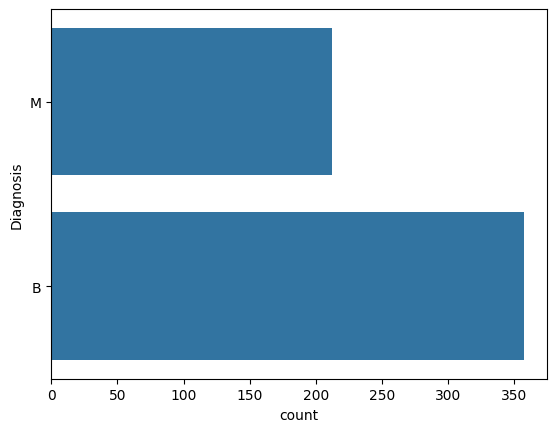

In [64]:
sns.countplot(data=Targets['Diagnosis'])

# 7.
Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).

In [65]:
NumericList = [int(i== 'M') for i in Targets['Diagnosis']]
CancerDataFrame['DiagnosisNumeric'] = NumericList


C:\Users\santi\AppData\Local\Temp\ipykernel_13768\2018295126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CancerDataFrame['DiagnosisNumeric'] = NumericList


# 8.
Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

In [66]:
for ColName in CancerDataFrame:
    if ColName == 'DiagnosisNumeric':
        continue
    ColData = CancerDataFrame[ColName]
    NewData = (ColData - ColData.mean())/ColData.std()
    CancerDataFrame[ColName] = NewData

CancerDataFrame.head()

C:\Users\santi\AppData\Local\Temp\ipykernel_13768\430957721.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CancerDataFrame[ColName] = NewData


,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,DiagnosisNumeric
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,1
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,1
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,1
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,1
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,1


# 9.
Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.

In [67]:
SimilarFeatures = set([Name[:-1] for Name in CancerDataFrame.columns])

ReducedDataFrame = pd.DataFrame()

for feature in SimilarFeatures:
    FeatureListName = CancerDataFrame.columns[CancerDataFrame.columns.str.startswith(feature)]
    FeatureDataFrame = CancerDataFrame[FeatureListName]
    ReducedDataFrame[feature+'Mean'] = FeatureDataFrame.mean(axis=1)

ReducedDataFrame['Diagnosis'] = Targets['Diagnosis']

# 10.
Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

In [68]:
RadiousMeanGrouped = ReducedDataFrame.groupby('Diagnosis')

RadiousMeanGrouped['RadiusMean'].describe()

,count,mean,std,min,25%,50%,75%,max
Diagnosis,,,,,,,,
B,357.0,-0.532181,0.332180,-1.468733,-0.743398,-0.539441,-0.312189,0.691043
M,212.0,0.896172,0.915975,-0.739660,0.196666,0.822527,1.443637,5.195367


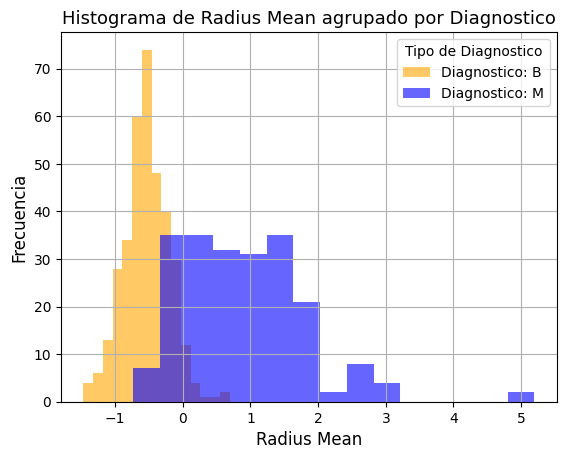

In [69]:
fig, ax = plt.subplots()

for name, group in RadiousMeanGrouped['RadiusMean']:
    group.hist(
        ax=ax,
        alpha=0.6,
        label=f'Diagnostico: {name}',
        bins=15,
        color='orange' if name == 'B' else 'blue'
    )

ax.set_title('Histograma de Radius Mean agrupado por Diagnostico', fontsize=13)
ax.set_xlabel('Radius Mean', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)
ax.legend(title='Tipo de Diagnostico')  

plt.show()

# 11.
Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```

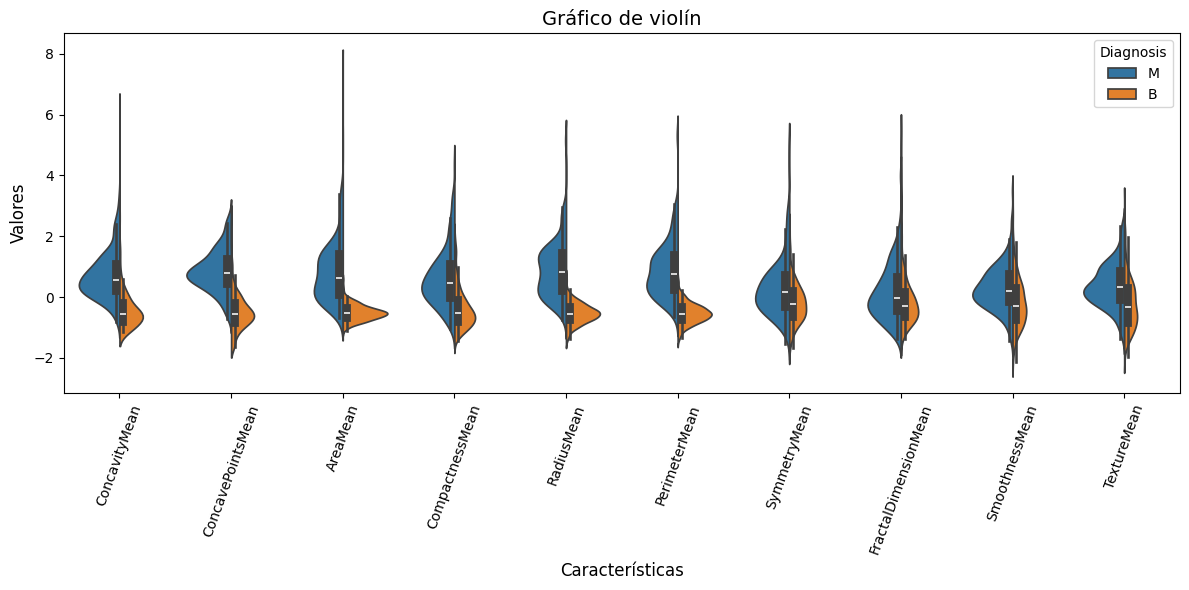

In [70]:
ColumnsToExclude = ['DiagnosisNumeriMean']

# Crear un nuevo DataFrame excluyendo las columnas que no deseas graficar
FilteredDf = ReducedDataFrame.drop(columns=ColumnsToExclude)

# Transformar el DataFrame a formato largo usando melt
melted_df = FilteredDf.melt(id_vars='Diagnosis', var_name='Features', value_name='Values')

# Crear el gráfico de violín con seaborn
plt.figure(figsize=(12, 6))
sns.violinplot(x='Features', y='Values', hue='Diagnosis', data=melted_df, split=True)

# Personalización del gráfico
plt.title('Gráfico de violín', fontsize=14)
plt.xlabel('Características', fontsize=12)
plt.ylabel('Valores', fontsize=12)

# Rotar las etiquetas del eje x y ajustar el diseño
plt.xticks(rotation=70)
plt.legend(title='Diagnosis')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# 12.
Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python 
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]

<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

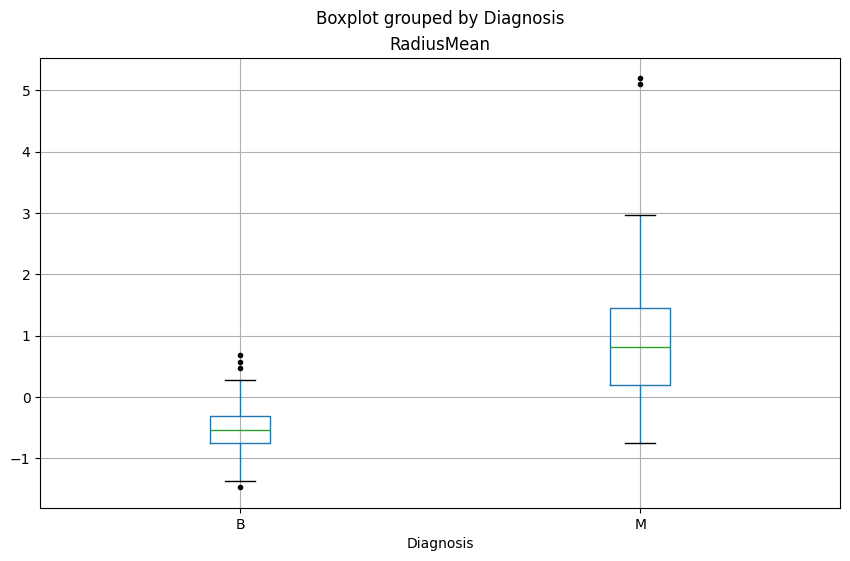

In [77]:
RadiousMean = ReducedDataFrame[['RadiusMean','Diagnosis']]

RadiousMean.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(10,6))

In [79]:
Q1 = RadiousMean['RadiusMean'].quantile(0.25)
Q3 = RadiousMean['RadiusMean'].quantile(0.75)
IQR = Q3 - Q1
RadiousMean = RadiousMean[~((RadiousMean['RadiusMean'] < (Q1 - 1.5 * IQR)) | (RadiousMean['RadiusMean'] > (Q3 + 1.5 * IQR)))]
RadiousMean

,RadiusMean,Diagnosis
0,1.822892,M
1,1.377122,M
2,1.438879,M
3,-0.241121,M
4,1.438539,M
...,...,...
562,0.015363,M
565,1.512694,M
566,0.482422,M
567,1.651053,M


<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

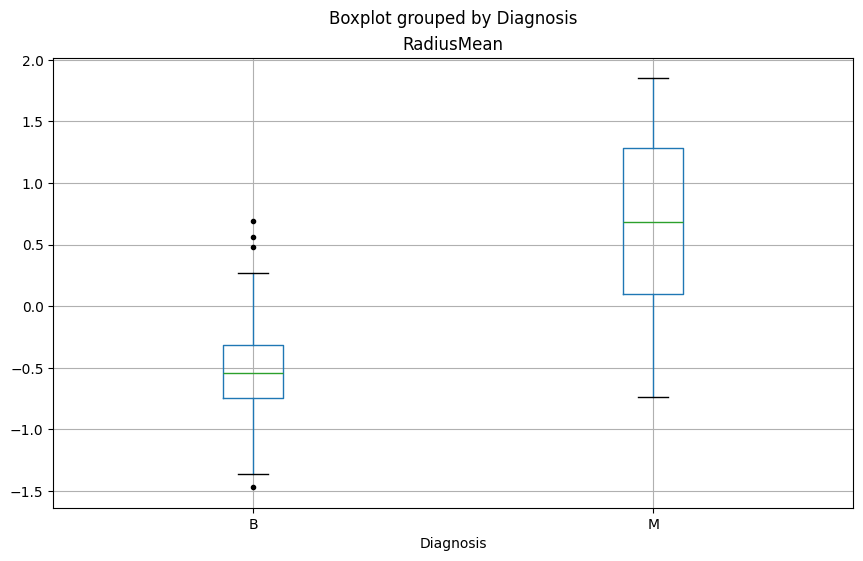

In [80]:
RadiousMean.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(10,6))

# 13.
Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

In [94]:
ReducedDataFrame[ReducedDataFrame.columns[:-1]].corr()

,ConcavityMean,ConcavePointsMean,AreaMean,CompactnessMean,RadiusMean,PerimeterMean,SymmetryMean,FractalDimensionMean,DiagnosisNumeriMean,SmoothnessMean,TextureMean
ConcavityMean,1.000000,0.851940,0.523914,0.865922,0.551518,0.593677,0.436395,0.594199,0.588727,0.398881,0.248010
ConcavePointsMean,0.851940,1.000000,0.710508,0.800022,0.756018,0.788247,0.404369,0.412250,0.734365,0.444162,0.238030
AreaMean,0.523914,0.710508,1.000000,0.416947,0.983948,0.976470,0.132301,-0.055236,0.697800,0.117483,0.237507
CompactnessMean,0.865922,0.800022,0.416947,1.000000,0.455363,0.515278,0.528691,0.733467,0.538228,0.482959,0.235962
RadiusMean,0.551518,0.756018,0.983948,0.455363,1.000000,0.991427,0.167383,-0.036127,0.745954,0.129467,0.256824
PerimeterMean,0.593677,0.788247,0.976470,0.515278,0.991427,1.000000,0.198767,0.011615,0.746845,0.146272,0.265161
SymmetryMean,0.436395,0.404369,0.132301,0.528691,0.167383,0.198767,1.000000,0.460782,0.300300,0.426417,0.135053
FractalDimensionMean,0.594199,0.412250,-0.055236,0.733467,-0.036127,0.011615,0.460782,1.000000,0.146058,0.554984,0.097860
DiagnosisNumeriMean,0.588727,0.734365,0.697800,0.538228,0.745954,0.746845,0.300300,0.146058,1.000000,0.293434,0.341047
SmoothnessMean,0.398881,0.444162,0.117483,0.482959,0.129467,0.146272,0.426417,0.554984,0.293434,1.000000,0.103908


# 14.
¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?